<a href="https://colab.research.google.com/github/007saurabhvashistha/data_science/blob/main/PanCard_Tempering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pan Card Tempering Detection

''' The purpose of this project is to detect the tempering of the pan card using computer vison.
this project will help differnt organization in detecting whether the id,
The Pan card provided to them by the employee or costumer or anyone is orginal or not.'''

# for this project we will calculate structural similarity of orginal Pancrad and the pancard uploaded by the user

' The purpose of this project is to detect the tempering of the pan card using computer vison.\nthis project will help differnt organization in detecting whether the id,\nThe Pan card provided to them by the employee or costumer or anyone is orginal or not.'

In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image
# open image and display
Orginal = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream = True).raw)

mkdir: cannot create directory ‘pan_card_tempering’: File exists
mkdir: cannot create directory ‘pan_card_tempering/image’: File exists


In [ ]:
#Loading Orginal and user provided images


In [ ]:
#The file format of the source file.
print('Orginal image format : ',Orginal.format)
print('tampered image format : ',tampered.format)


Orginal image format :  JPEG
tampered image format :  PNG


In [ ]:
#Image size, in pixels, The size is given as a z-tuple(width,height)
print('Orginal image size: ',Orginal.size)
print('Tempered image size: ',tampered.size)

Orginal image size:  (1200, 800)
Tempered image size:  (282, 179)


In [ ]:
#Converting the format of tempered image similar to orginal image.

In [ ]:
#Resize Image
Orginal = Orginal.resize((250,160))
print(Orginal.size)
Orginal.save('pan_card_tempering/image/orginal.png') #save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tempering/image/tempered.png') #save images

(250, 160)
(250, 160)


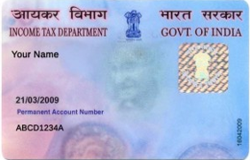

In [ ]:
 #Display user given image
tampered

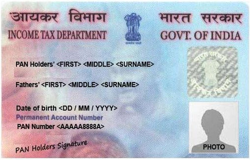

In [ ]:
#display orginal
Orginal

user provided image which wil be compared with PanCard

In [ ]:
#load the two images
Orginal = cv2.imread('pan_card_tempering/image/orginal.png')
tempered = cv2.imread ('pan_card_tempering/image/tempered.png')

reading the images using OPENCV

In [ ]:
#convert the images to gryscale
Orginal_gray = cv2.cvtColor(Orginal,cv2.COLOR_BGR2GRAY)
tempered_gray = cv2.cvtColor(tempered,cv2.COLOR_BGR2GRAY)

converting images into grayscale using opencv. Because in image processing many applicatons doesn't help us in identifying the important edges of the colored images also colored images are bit complex to understand by machine because they have 3 channel while grayscale has only one channel

In [ ]:
#compute the Structural Similarty index('SSIM') between the two images, ensuring that the difference image isreturned
(score,diff) = structural_similarity(Orginal_gray,tempered_gray,full=True)
diff = (diff+255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


structural similarity index helps us to detrmine exactly where in terms of x,y coordinates location, the image differences are .
here , we are trying to find between the orginal and tempered image the lower the SSIM score lower is the similarity

In [ ]:
# Calculating threshold and contours (pre difine in cv2 lib)
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

here we are usng the threshhold function of computer vision which appies an adaptive threshold to the image which is stored in the form of array. this function transform the grayscale image into binary image using a mathematical formula.

 find contours work on binary image and retrive the contours . this contours are uselful tool for shape analysis and recognization. Grab contours grabs the appropriate value of the contours.

In [ ]:
#loop over the contour
for c in cnts:
  #applying countours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(Orginal,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tempered,(x,y),(x+w,y+h),(0,0,255),2)

Bounding rectangle hepls in finding the ratio of width to height of boundaries rectangle of the objects.We computes the bounding box of the contour and then draw the bounding box on the both images to represents where the two images are differnt or not

Orginal Format Image


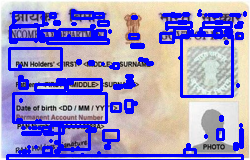

In [ ]:
#Display orginal image with contour
print("Orginal Format Image")
Image.fromarray(Orginal)


Tempered Format Image


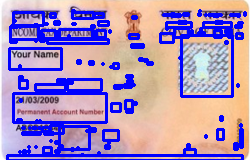

In [ ]:
#display tempered image with contours
print("Tempered Format Image")
Image.fromarray(tempered)

Different Image


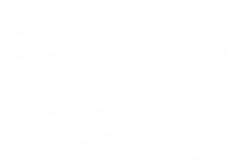

In [ ]:
#display diffrence images with black
print("Different Image")
Image.fromarray(diff)


Threshold Image


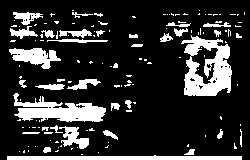

In [ ]:
#display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)

Creating Flask file